In [6]:
#Importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#1. Data Exploration

In [7]:
#Importing the datasets and creating 'train' and 'test' dataframes.
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

In [8]:
#Display the head of the dataframe
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#Summary Statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Listing all the columns in the dataframe.
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
# Finding the null values in all the columns.
total = train.isnull().sum().sort_values(ascending=False)
total

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
train['Survived'].value_counts()                                 #No. of people who survived and who didn't.

,count
Survived,
0,549
1,342


<AxesSubplot:xlabel='Survived', ylabel='count'>

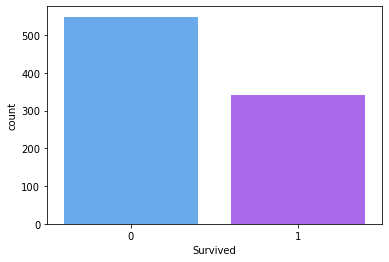

In [ ]:
# Generating plots to see the most important columns:
sns.countplot(x='Survived',data=train,palette='cool')            #Plot for No. of people who survived and who didn't.

<Axes: >

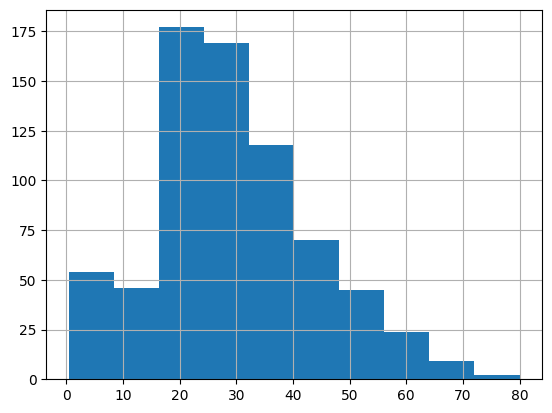

In [24]:
train ["Age"]. hist ()                                             #People who survived based on age.

<Axes: xlabel='SibSp', ylabel='count'>

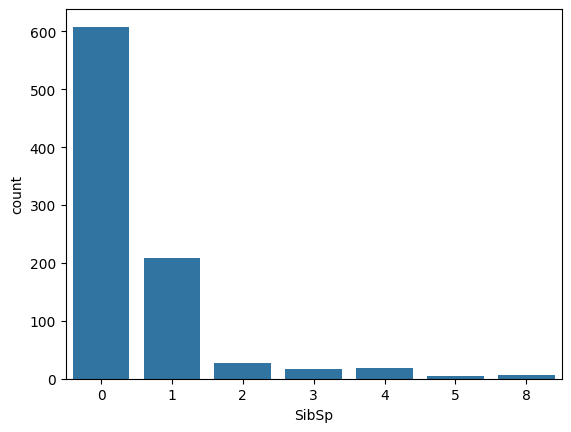

In [27]:
sns.countplot (x ="SibSp", data = train)                          #Siblings/Spouses aboard the ship.

<Axes: xlabel='Parch', ylabel='count'>

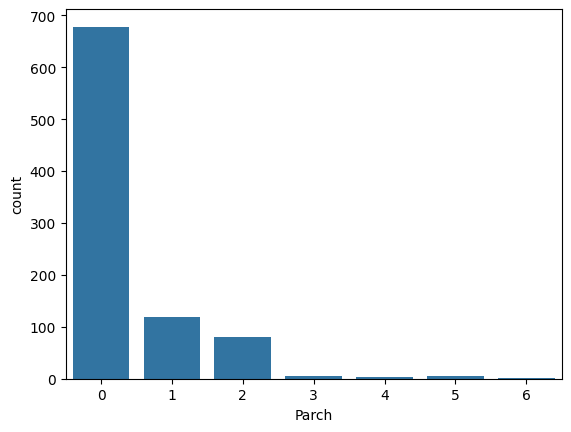

In [28]:
sns.countplot (x ="Parch", data = train)                          # Parent/Children aboard the ship.

<AxesSubplot:xlabel='Survived', ylabel='count'>

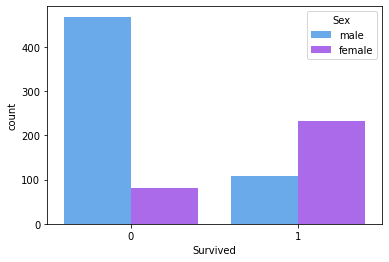

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='cool')   #Plot for No. of people who survived and who didn't based on gender.

<Axes: xlabel='Pclass', ylabel='count'>

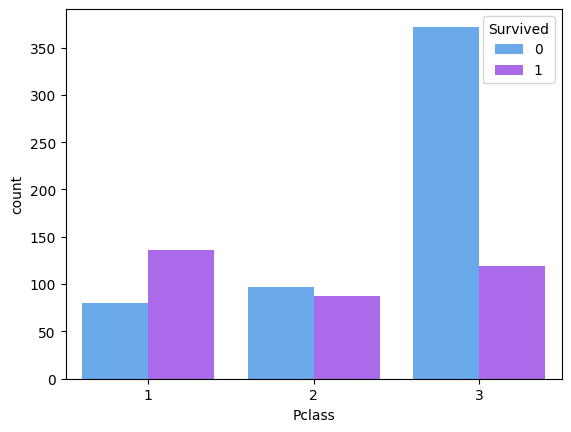

In [14]:
sns.countplot(x='Pclass',hue='Survived', data=train, palette='cool')   ##Plot for No. of people who survived and who didn't based on Pclass.

In [ ]:
#We can see clearly that Pclass is contributing to passengers chance of survival, especially if this person is in class 1.

<Axes: xlabel='Embarked', ylabel='count'>

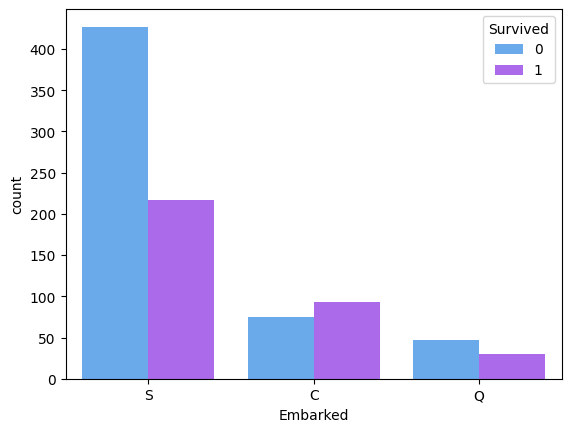

In [20]:
sns.countplot(x='Embarked',hue='Survived', data=train, palette='cool')          #Plot showing people who survived based on embarked location.

<Axes: xlabel='Pclass', ylabel='Age'>

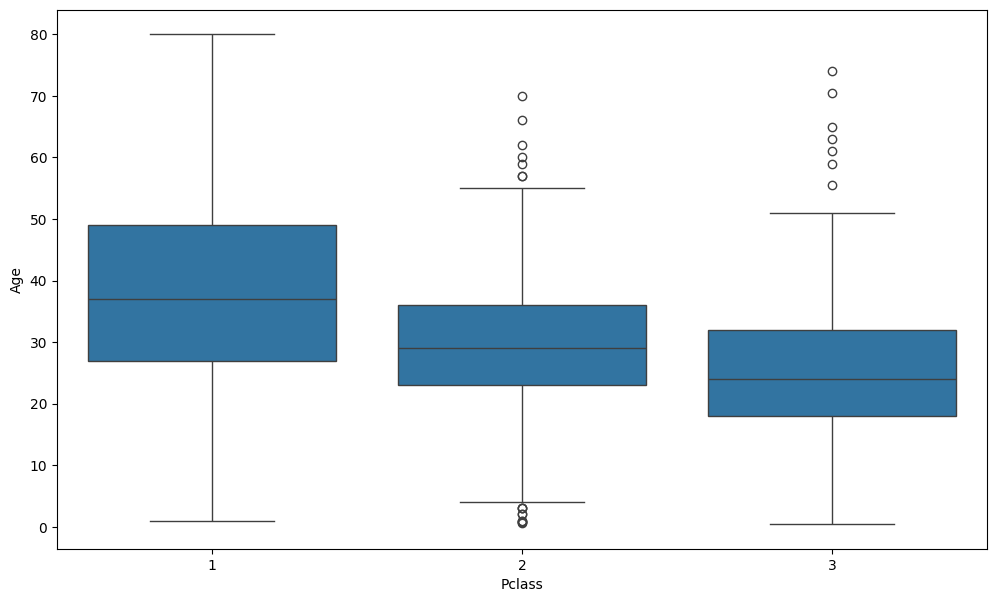

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train)                                #Boxplot between Pclass and Age. This shows the average age of people belonging to different classes in the ship.

In [ ]:
# We can see that the wealthier passengers in the higher classes tend to be older.
# We’ll use these average age values to fill in the missing values of Age by the mean age of all the passengers instead of just dropping the missing age data rows.
# We can also see that passengers in Pclass 1 had a high survival rate and passengers in Pclass 3 had low survival rate.

In [ ]:
# 2. Data Pre-processing

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
total = train.isnull().sum().sort_values(ascending=False)
total

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [29]:
# As we can see above, there are 687 null values in Cabin column,
# 177 null values in age column and 2 null values in the embarked column.
# We will add the median of ages based on the Pclass to replace the missing values in the Age column.

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [31]:
# And now, let's apply it.
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)
# We choose axis=1 because we want our function to act on rows.

<ipython-input-29-1e10a9025b78>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-29-1e10a9025b78>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]
<ipython-input-29-1e10a9025b78>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-29-1e10a9025b78>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys wil

Text(0.5, 1.0, 'Male')

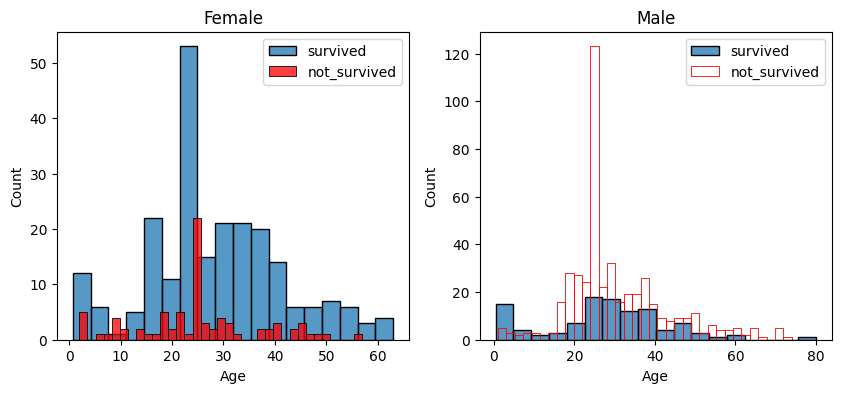

In [32]:
# Now displaying the number of survived passengers by Sex and Age:

women = train[train['Sex']=='female']
men = train[train['Sex']=='male']

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))              # To display two plots side-by-side

ax = sns.histplot(women[women['Survived']==1].Age, bins=18, label = 'survived', ax = axes[0])
ax = sns.histplot(women[women['Survived']==0].Age, bins=35, label = 'not_survived', ax = axes[0], color='r')
ax.legend()
ax.set_title('Female')

ax = sns.histplot(men[men['Survived']==1].Age, bins=18, label = 'survived', ax = axes[1])
ax = sns.histplot(men[men['Survived']==0].Age, bins=35, label = 'not_survived', ax = axes[1], color='r', fill=False)
ax.legend()
ax.set_title('Male')

In [33]:
# We will drop the cabin column as there are high number of missing values and does not affect the Survival chances.
train.drop('Cabin',axis='columns',inplace=True)
test.drop('Cabin',axis='columns',inplace=True)
# axis= means the columns axis and when inplace=True is passed, the operation occurs in place so we don't have to add an assignment statement.

In [34]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
test.dropna(inplace=True)

<Axes: >

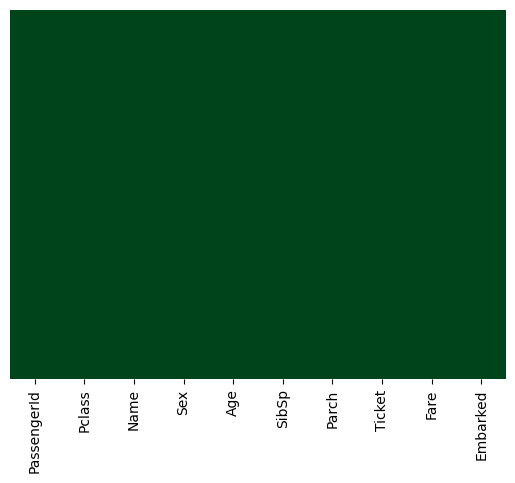

In [36]:
sns.heatmap(test.isnull(),yticklabels=False,cmap='BuGn_r',cbar=False)

In [ ]:
# We can see above that there are no null values.

In [37]:
# We will replace the null values in Embarked column with the most common value.
train['Embarked'].describe()

,Embarked
count,889
unique,3
top,S
freq,644


In [38]:
# We can see from above that the most commun value in this column is S, so let's fill the two missed rows with S:
train['Embarked'] = train['Embarked'].fillna('S')

In [39]:
# Checking for null values
total = train.isnull().sum().sort_values(ascending=False)
total

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# As we can see from above, there are no null values.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [40]:
train['Sex'].value_counts()                         # Total no. of male and female passengers.

,count
Sex,
male,577
female,314


In [42]:
train['Embarked'].value_counts()                    # Total no. of passengers embared at each location.

,count
Embarked,
S,646
C,168
Q,77


In [44]:
# Replacing Sex and Embarked values with numerical variables.
train.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [56]:
# Dropping the PassengerId, Name and Ticket columns since they have no relation with the survival outcome.
X = train.drop(['PassengerId','Name','Ticket','Survived'], axis=1)
y = train['Survived']

In [57]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [58]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
3. Model Building

In [ ]:
# Using train_test_split function:
# We have already our test dataset but without Survived column, so if we want to compute the model accuracy,
# we should split our train dataset to another train and test datasets to test our model on this new test dataset generated by this function.

In [61]:
from sklearn.model_selection import train_test_split as tts                     # Splitting the Train dataset.
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.25,random_state=42)
# or we can use train_size=0.75 instead of test_size=0.25
print(X_train.shape)                                                            # Displaying the rows and columns in x_train, x_test, y_train and y_test.
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 7)
(223, 7)
(668,)
(223,)


In [62]:
#Training the model.

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)                                                     # Fitting the train data into the model.

LogisticRegression()

In [ ]:
# 4. Model Evaluation

In [74]:
# Calculating the accuracy, precision, recall and f1 score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

x_train_prediction = model.predict(X_train)                                     # Training the model using train data.
print(classification_report(y_train, x_train_prediction))
print('Accuracy Score:', metrics.accuracy_score(y_train, x_train_prediction))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       415
           1       0.77      0.68      0.72       253

    accuracy                           0.80       668
   macro avg       0.79      0.78      0.78       668
weighted avg       0.80      0.80      0.80       668

Accuracy Score: 0.8008982035928144


In [75]:
# Passing the Test data to the trained model.
x_test_prediction = model.predict(X_test)
print(classification_report(y_test, x_test_prediction))
print('Accuracy Score:', metrics.accuracy_score(y_test, x_test_prediction))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.79      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.81      0.82      0.81       223

Accuracy Score: 0.8161434977578476


In [70]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
x_test_prediction = cross_val_predict(model, X_test, y_test, cv=3)
confusion_matrix(y_test, x_test_prediction)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([[116,  18],
       [ 23,  66]])

In [ ]:
# The confusion matrix is just a tally to tell you what your model got right and what it got wrong.
# The first row represents the not-survived-predictions: 116 passengers were correctly classified as not survived (called true negatives) and
# 18 where wrongly classified as not survived (false positives).
# The second row is about the survived-predictions: 23 passengers where wrongly classified as survived (false negatives) and 66 where correctly classified as survived (true positives).


In [87]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_test, x_test_prediction))
print("Recall:", recall_score(y_test, x_test_prediction))

Precision: 0.7926829268292683
Recall: 0.7303370786516854


In [ ]:
# Our model predicts almost 80% of passengers survival correctly (precision).
# The recall tells us that it predicts the survival of 73% of the people who actually survived.

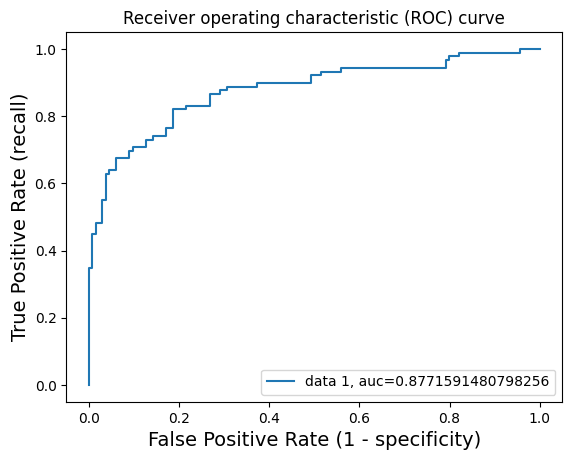

In [97]:
# Plotting the ROC Curve.

import matplotlib.pyplot as plt
y_pred_proba = model.predict_proba(X_test)[::,1]                          # y_pred_proba is the predicted probabilty for survival
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)          # x-axis is False Positive Rate(1-Specificity)
plt.ylabel('True Positive Rate (recall)', fontsize=14)                    # y-axis is True Positive Rate(Recall)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [98]:
# AUC score calculation:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_proba)                                 # Area under curve calculation
print("AUC Score:", auc_score)

AUC Score: 0.8771591480798256


In [ ]:
# 5. Interpretation

In [103]:
# Displaying the features and coefficients of the trained logistic regression model.

import pandas as pd
# Accessing the coefficients of the trained Logistic Regression model
coefficients = model.coef_

# Printing the coefficients
print(coefficients)

# Accessing the intercept
intercept = model.intercept_
print(intercept)


# Creating a DataFrame to display coefficients with feature names
feature_names = X.columns.tolist()
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

# Sorting by absolute coefficient value to see the most influential features
coefficients_df = coefficients_df.reindex(coefficients_df.Coefficient.abs().sort_values(ascending=False).index)

coefficients_df

[[-1.02465589  2.54655613 -0.03638199 -0.28618071 -0.10892862  0.0035358
   0.19902355]]
[1.93196624]


,Feature,Coefficient
1,Sex,2.546556
0,Pclass,-1.024656
3,SibSp,-0.286181
6,Embarked,0.199024
4,Parch,-0.108929
2,Age,-0.036382
5,Fare,0.003536


In [104]:
# Interpretation of coefficients:

# We can analyze the coefficients_df to understand which features were most important in predicting survival and how they influenced the model's predictions.
# A positive coefficient indicates that an increase in that feature is associated with an increased probability of survival.
# A negative coefficient indicates that an increase in that feature is associated with a decreased probability of survival.
# The magnitude of the coefficient indicates the strength of the relationship. Larger absolute values suggest a stronger influence.

# In the given data set, 'Sex'(male=0,female = 1). When going from male to female, the probability of survival increases by 2.546.
# This indicates higher probability of survival for female.

# When going from Class 1 to Class 2, the probability of survival reduces by 1.024.
# Higher 'Pclass'(high class=0) indicates higher probability of survival.

In [ ]:
# The significance of features in predicting the survival probability.


# Based on the coefficients_df, we can observe the significance of various features:

# 1. Sex:
# The positive coefficient for 'Sex' (likely with female represented by 1) suggests that being female was strongly associated with a higher probability of survival.
# This aligns with the historical accounts of the Titanic disaster, where women and children were prioritized during evacuation.

# 2. Pclass:
# The negative coefficients for 'Pclass' indicate that passengers in lower classes (3rd class) had a lower probability of survival compared to those in higher classes (1st class).
# This suggests that social status and access to resources played a significant role in survival chances.

# 3. Fare:
# The positive coefficient for 'Fare' suggests that higher fare prices were associated with an increased probability of survival.
# This could be related to the fact that passengers with higher fares often had better cabin locations, possibly closer to lifeboats or with access to more resources.

# 4. Age:
# The coefficient for 'Age' might indicate a slight negative correlation with survival, suggesting that younger passengers had a slightly higher probability of survival.
# This aligns with the prioritization of children and infants during the evacuation.

# 5. Embarked:
# The coefficients for 'Embarked' might show variations in survival rates depending on the port of embarkation.
# This could be due to factors like the location of cabins or the availability of lifeboats at different ports.

# 6. SibSp and Parch:
# The coefficients for 'SibSp' (number of siblings/spouses) and 'Parch' (number of parents/children) might show a complex relationship with survival.
# Having family members could increase the chances of survival, but possibly only to a certain degree.
# Large families might face challenges during evacuations, leading to a reduced probability of survival.

# The coefficients represent the relationship between each feature and survival while accounting for the influence of other features.

# Analyzing the magnitude and sign of these coefficients allows us to gain insight into the key factors that influenced survival on the Titanic.